## Description:

    Ordination and Hypothesis testing



# Setting variables

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(phyloseq)
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(dplyr)
library(tidyr)
library(vegan)


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: iterators

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following object is masked from ‘package:gridExtra’:

    combine


  warnings.warn(x, RRuntimeWarning)
/opt/anacon

# Loading phyloseq object - rarified data

In [4]:
%%R
F = file.path('/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_r')
physeq.Full = readRDS(F)
sd = sample_data(physeq.Full)
physeq.Full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [5]:
%%R
sample_data(physeq.Full)$Rep = factor(sample_data(physeq.Full)$Rep)
sample_data(physeq.Full)$DAP = factor(sample_data(physeq.Full)$DAP)
colnames(sample_data(physeq.Full))

 [1] "X.sample"            "Library"             "Primer_Plate"       
 [4] "Primer_Well_ID"      "primerFR_ID_byPlate" "primerFR_ID_total"  
 [7] "barcode_ID"          "PlotID"              "Plant"              
[10] "Plot"                "Treatment"           "Rep"                
[13] "DAP"                 "Sampling"            "PlantSample"        
[16] "Type"                "Grass_Broad"         "Status"             
[19] "Subfamily"           "fwd_barcode"         "rev_barcode"        
[22] "Planted"             "Biomass_P"           "SLA"                
[25] "Leaf_N"              "Leaf_C"              "LeafC_N"            
[28] "LNa"                 "Plant_N"             "Plant_C"            
[31] "Plant_CN"            "d15N"                "tN_p"               
[34] "BX_activity_g"       "CB_activity_g"       "LAP_activity_g"     
[37] "NAG_activity_g"      "BX_rel"              "CB_rel"             
[40] "LAP_rel"             "NAG_rel"             "NO3_ug_g"           
[43] "

## Calculate pairwise weighted Unifrac distances between samples

In [6]:
%%R
registerDoParallel(cores=28)
wunif.dist = distance(physeq.Full, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

unif.dist = distance(physeq.Full, 
                      method = "unifrac", 
                      weighted = FALSE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [7]:
%%R
# Try PCoA 

ordu = ordinate(physeq.Full, "PCoA", "unifrac", weighted=TRUE)


In [8]:
%%R
sample_data(physeq.Full)$Plant = factor(sample_data(physeq.Full)$Plant, levels = c("BARE", "75-062", "B73", "B97" ,  "H99" , "Hp301",
                                                                      "Il14H",  "Ki3" , "Mo18", "MS71","Oh7B", "Tx303",
                                                                      "ECHCG", "SETFA", "SORBI", "SORSUD", 
                                                                      "ELCOR", "ERATE",
                                                                      "ABUTH", "HELAN", "FAGES", "AMAPO", "GLYMA"))

p = plot_ordination(physeq.Full, ordu, justDF = TRUE)

In [9]:
%%R
p %>% head

                      Axis.1     Axis.2          X.sample Library Primer_Plate
sample2-1.06_Npos -0.1533022 0.03219172 sample2-1.06_Npos       1            1
sample6-4.27_Npos -0.1298658 0.05804125 sample6-4.27_Npos       1            2
sample4-4.27_Nneg -0.1490966 0.02604058 sample4-4.27_Nneg       1            1
sample4-1.06_Nneg -0.1293516 0.04557593 sample4-1.06_Nneg       1            1
sample2-1.06_Nneg -0.1430756 0.02717373 sample2-1.06_Nneg       1            1
sample6-3.07_Nneg -0.1514181 0.06413171 sample6-3.07_Nneg       1            2
                  Primer_Well_ID primerFR_ID_byPlate primerFR_ID_total
sample2-1.06_Npos             H9                  72                72
sample6-4.27_Npos            F11                  86               182
sample4-4.27_Nneg            B12                  90                90
sample4-1.06_Nneg            E11                  85                85
sample2-1.06_Nneg             G9                  71                71
sample6-3.07_Nneg    

# Ordination for ISME poster

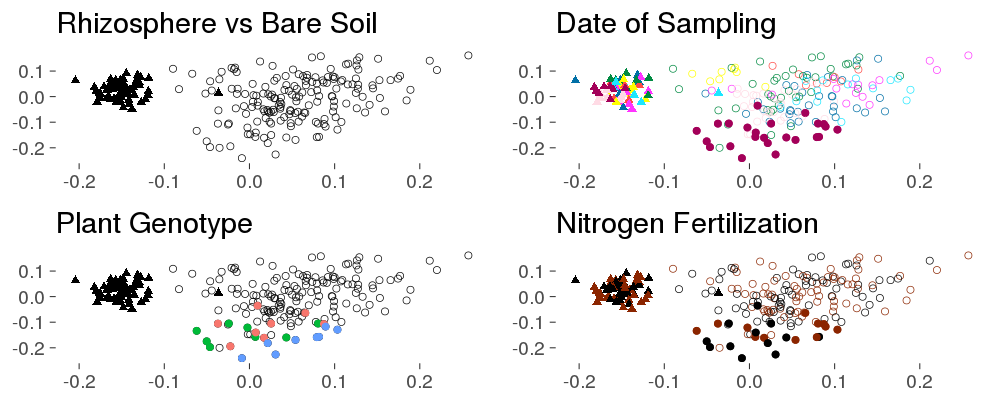

In [10]:
%%R -w 1000 -h 400

#p = plot_ordination(physeq.Full, ordu, shape = "Planted") +
p1 = ggplot(p, aes(x = Axis.1, y = Axis.2, shape = Planted)) +
geom_point(size = 3) +
scale_shape_manual(values=c(17, 1), labels = c("Bare Soil", "Rhizosphere")) +
#scale_fill_manual(values=c("#000000", "#FFFF00")) +  



#   scale_color_manual(values = c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
#         "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
#         "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")) + 
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
theme_bw(base_size = 24) +
theme(panel.grid = element_blank()) +
theme(panel.border = element_blank()) +
theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
theme(legend.position="none") +
ggtitle("Rhizosphere vs Bare Soil")
p1

p$DAP = as.factor(p$DAP)

p2 = ggplot(p, aes(x = Axis.1, y = Axis.2)) +
geom_point(data = p, aes(x = Axis.1, y = Axis.2, color = DAP, shape = Planted), size = 3) +
scale_color_manual(values = c("#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
       "#FFDBE5")) + 
guides(color=guide_legend(ncol=2))+
scale_shape_manual(values=c(17, 1)) +
geom_point(data = subset(p, DAP == "84" & Plant != "BARE"), aes(x = Axis.1, y = Axis.2), color = "#A30059", size = 3)+

scale_fill_manual(values=c("#000000", "#FFFF00")) +  




labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
theme_bw(base_size = 24) +
theme(panel.border = element_blank()) +
theme(panel.grid = element_blank()) +
theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1),
     axis.title.y = element_blank(),
     axis.title.x = element_blank()) +
theme(legend.position="none") +
ggtitle("Date of Sampling")
p2



p3 = ggplot(p, aes(x = Axis.1, y = Axis.2))+
geom_point(data = p, aes(x = Axis.1, y = Axis.2, shape = Planted), size = 3) +
#geom_point(data = p, aes(shape = Planted, size = 3)) +
scale_shape_manual(values=c(17, 1)) +
geom_point(data = subset(p, DAP == "84" & Plant != "BARE"), aes(x = Axis.1, y = Axis.2, color = Plant), size = 3)+
  
scale_fill_manual(values = c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
         "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
         "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")) + 
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
theme_bw(base_size = 24) +
theme(panel.grid = element_blank()) +
theme(panel.border = element_blank()) +
theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1),
     axis.title.y = element_blank(),
     axis.title.x = element_blank()) +
theme(legend.position="none") +
ggtitle("Plant Genotype")
p3

# p4 = ggplot(p, aes(x = Axis.1, y = Axis.2) +
# geom_point(size = 3) +
# scale_shape_manual(values=c(17, 1)) +
# #scale_fill_manual(values=c("#000000", "#FFFF00")) +  

p4 = ggplot(p, aes(x = Axis.1, y = Axis.2))+
geom_point(data = p, aes(shape = Planted, shape = Planted, color = Treatment), size = 3) +
scale_shape_manual(values=c(17, 1)) +
geom_point(data = subset(p, DAP == "84" & Plant != "BARE"), aes(x = Axis.1, y = Axis.2, color = Treatment), size = 3)+
  


scale_color_manual(values = c("#000000", "orangered4"),
                       labels=c("0kg N", "95kg N"))+ #FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
#         "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
#         "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")) + 
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
theme_bw(base_size = 24) +
theme(panel.grid = element_blank()) +
theme(panel.border = element_blank()) +
theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1),
     axis.title.x = element_blank(),
     axis.title.y = element_blank()) +
theme(legend.position="none") +
ggtitle("Nitrogen Fertilization")
p4
grid.arrange(p1, p2, p3, p4, ncol = 2)

In [11]:
%%R
# saving figure

pdf(file = "/home/bryan/RhizCG/figures/ordinations/PCoA_v2.pdf", 
    height = 7, width = 12)
grid.arrange(p1, p2, p3, p4, ncol = 2)%>% print
dev.off()

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
png 
  2 


# Ordination for paper

In [12]:
%%R
library("cowplot")

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘cowplot’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following object is masked from ‘package:ggplot2’:

    ggsave


  warnings.warn(x, RRuntimeWarning)


In [13]:
%%R
p = plot_ordination(physeq.Full, ordu, justDF = TRUE) 

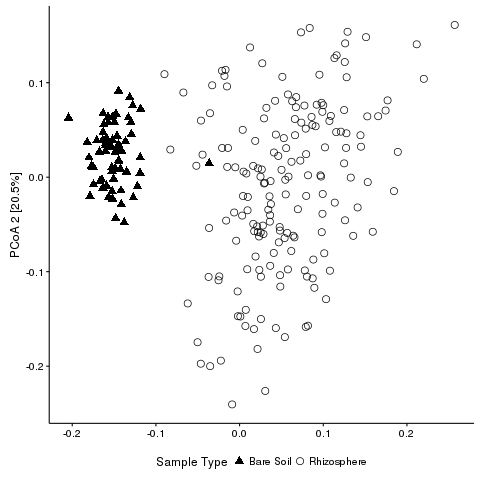

In [14]:
%%R
 p1 = ggplot(p, aes(x = Axis.1, y = Axis.2, shape = Planted)) +
geom_point(size = 3) +
scale_shape_manual(values=c(17, 1), labels = c("Bare Soil", "Rhizosphere"), 
                   guide = guide_legend(title = "Sample Type")) +
#scale_fill_manual(values=c("#000000", "#FFFF00")) +  



#   scale_color_manual(values = c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
#         "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
#         "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")) + 
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
theme_cowplot(font_size = 12) +
theme(axis.title.x = element_blank()) +
theme(legend.position="bottom") 

p1

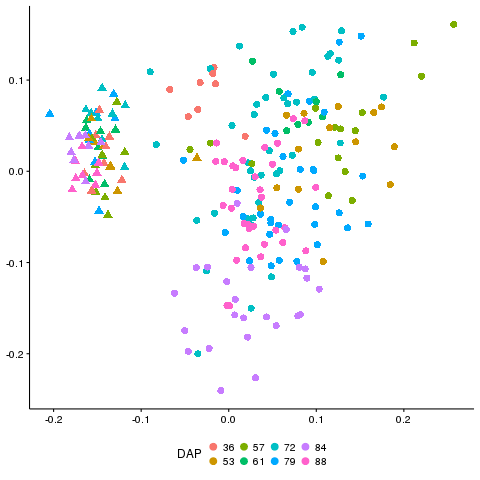

In [15]:
%%R
p$DAP = as.factor(p$DAP)

p2 = ggplot(p, aes(x = Axis.1, y = Axis.2)) +
geom_point(data = p, aes(x = Axis.1, y = Axis.2, color = DAP, shape = Planted), size = 3) +
scale_shape_manual(values=c(17, 16), guide = FALSE)+ 
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
theme_cowplot(font_size = 12) +
theme(axis.title.x = element_blank(), axis.title.y = element_blank()) +
theme(legend.position="bottom") 

p2

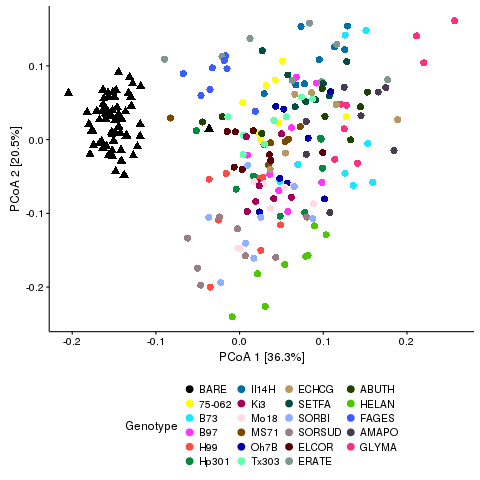

In [16]:
%%R
p3 = ggplot(p, aes(x = Axis.1, y = Axis.2))+
geom_point(data = p, aes(x = Axis.1, y = Axis.2, shape = Planted, color = Plant), size = 3) +
#geom_point(data = p, aes(shape = Planted, size = 3)) +
scale_shape_manual(values=c(17, 16), guide = FALSE) +
  
scale_color_manual(values = c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
         "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
         "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80"), 
                   guide = guide_legend(title = "Genotype", ncol = 4)) + 
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
theme_cowplot(font_size = 12) +
#theme(axis.title.x = element_blank()) +
theme(legend.position="bottom") 
# ggtitle("Plant Genotype")
p3

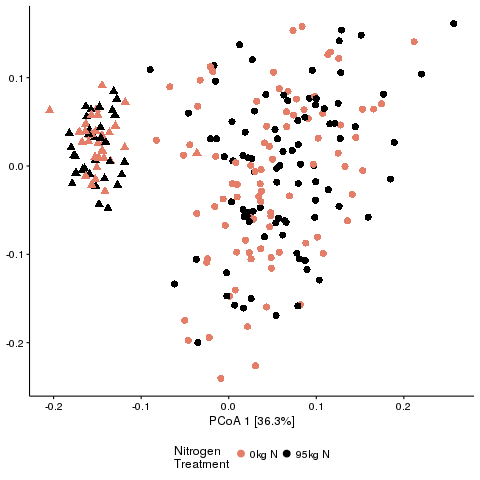

In [17]:
%%R
p4 = ggplot(p, aes(x = Axis.1, y = Axis.2))+
geom_point(data = p, aes(shape = Planted, color = Treatment), size = 3) + #shape = Planted
scale_shape_manual(values=c(17, 16), guide = FALSE) +
scale_color_manual(values = c("#E57E68", "#000000"), labels=c("0kg N", "95kg N"), 
                  guide = guide_legend(title = "Nitrogen\nTreatment", pch = 16, color = c("#E57E68", "#000000"))) +


  
# scale_color_manual(values = c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
#          "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
#          "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80"), 
#                    guide = guide_legend(title = "Genotype")) + 

labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
 theme_cowplot(font_size = 12) +
# # theme(panel.grid = element_blank()) +
# # theme(panel.border = element_blank()) +
# # theme(axis.line.x = element_line(color="black", size = 1),
# #     axis.line.y = element_line(color="black", size = 1),
 theme(axis.title.y = element_blank())+ 
 theme(legend.position="bottom")

p4

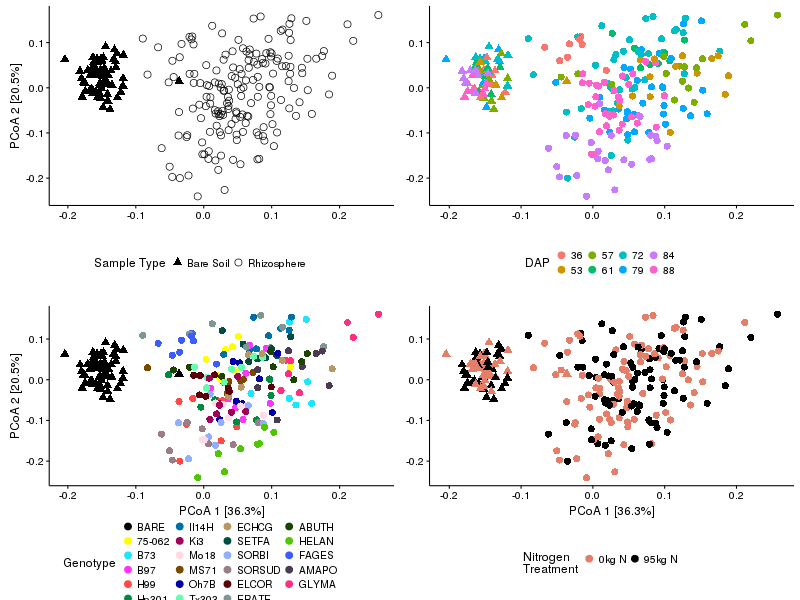

In [18]:
%%R -w 800 -h 600
g_legend<-function(a.gplot){
    tmp <- ggplot_gtable(ggplot_build(a.gplot))
    leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
    legend <- tmp$grobs[[leg]]
    legend
}

legend1 <- g_legend(p1)
legend2 <- g_legend(p2)
legend3 <- g_legend(p3)
legend4 <- g_legend(p4)                       
p1.f =  p1 + theme(legend.position = 'none')
p2.f =  p2 + theme(legend.position = 'none')
p3.f =  p3 + theme(legend.position = 'none')                        
p4.f =  p4 + theme(legend.position = 'none')
                        

grid.arrange(p1.f, p2.f, legend1, legend2, p3.f, p4.f, legend3, legend4, 
    ncol=2, heights=c(3,1,3,1))


In [19]:
%%R
pdf("/home/bryan/RhizCG/figures/ordinations/PCoA_pub.pdf", width = 7.05, heigh = 6)
grid.arrange(p1.f, p2.f, legend1, legend2, p3.f, p4.f, legend3, legend4, 
    ncol=2, heights=c(3,1,3,1.5), widths = c(3.7, 3.35))
dev.off()

png 
  2 


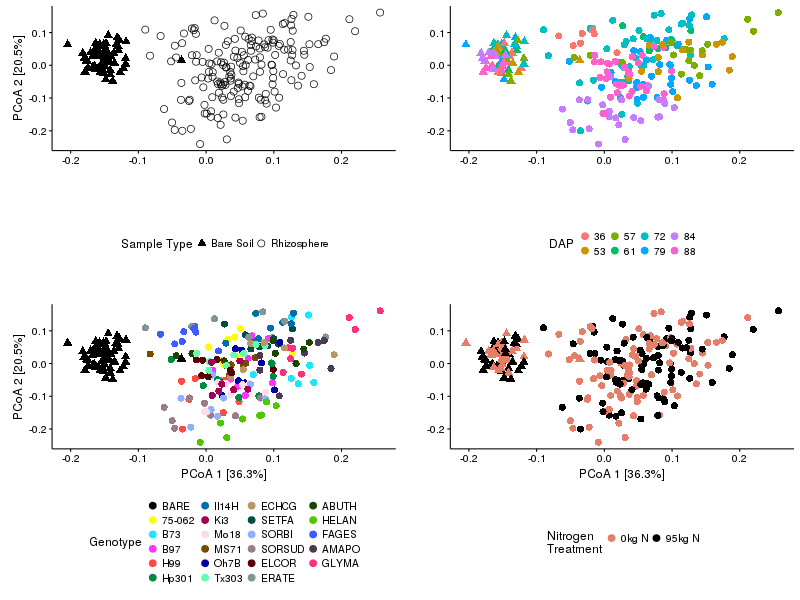

In [20]:
%%R -w 800 -h 600
pF = plot_grid(p1, p2, p3, p4, ncol = 2, align = 'hv')
pF

In [21]:
%%R
save_plot("/home/bryan/RhizCG/figures/ordinations/PCoA_pub.pdf", pF, base_aspect_ratio = 1.3)

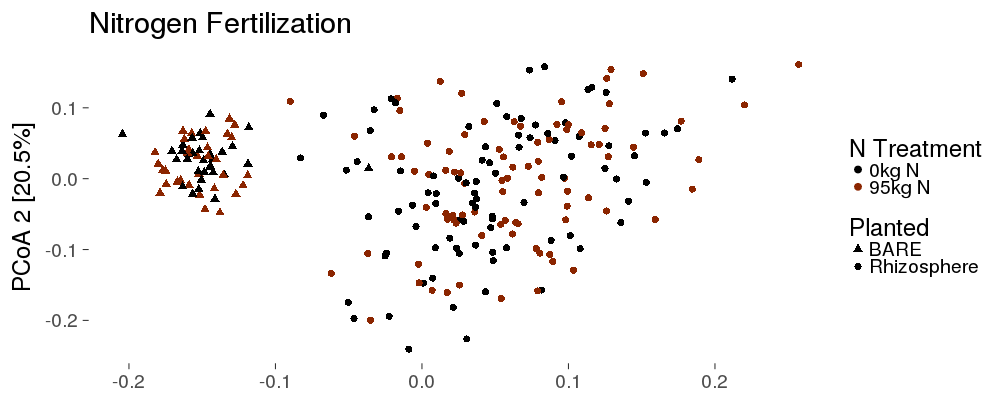

In [22]:
%%R -w 1000 -h 400






# p4 = ggplot(p, aes(x = Axis.1, y = Axis.2) +
# geom_point(size = 3) +
# scale_shape_manual(values=c(17, 1)) +
# #scale_fill_manual(values=c("#000000", "#FFFF00")) +  

p4 = ggplot(p, aes(x = Axis.1, y = Axis.2))+
geom_point(data = p, aes(shape = Planted, shape = Planted, color = Treatment), size = 3) +
scale_shape_manual(values=c(17, 16)) +
#geom_point(data = subset(p, DAP == "84" & Plant != "BARE"), aes(x = Axis.1, y = Axis.2, color = Treatment), size = 3)+
  


scale_color_manual(values = c("#000000", "orangered4"),
                       labels=c("0kg N", "95kg N"), guide = guide_legend(title = "N Treatment"))+ #FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
#         "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
#         "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")) + 
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
theme_bw(base_size = 24) +
theme(panel.grid = element_blank()) +
theme(panel.border = element_blank()) +
theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1),
     axis.title.x = element_blank()) +
theme(legend.position="right") +
ggtitle("Nitrogen Fertilization")
p4


# Just bare soil to show time

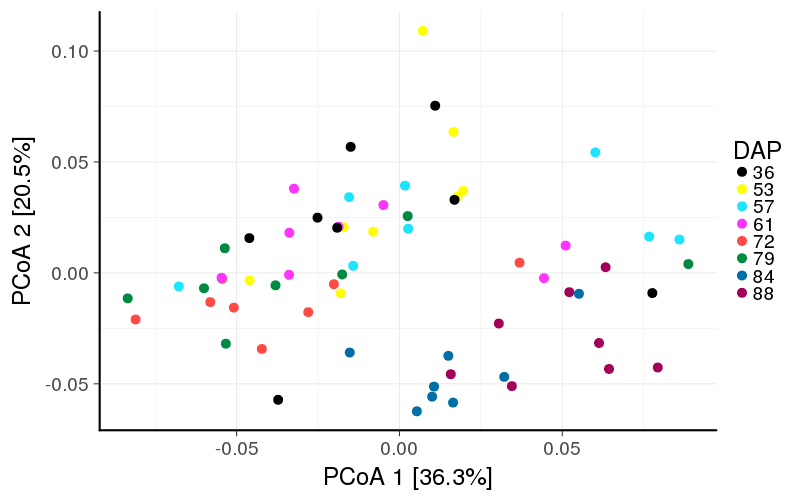

In [24]:
%%R -w 800 -h 500

Temp = subset_samples(physeq.Full, Plant == "BARE")
ordu = ordinate(Temp, "PCoA", "unifrac", weighted=TRUE)
p = plot_ordination(Temp, ordu, color="DAP") +
geom_point(size = 4) + 

  scale_color_manual(values = c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")) +
#scale_shape_manual(values=c(0, 16, 17, 15, 3, 7))  
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
theme_bw(base_size = 24) +
theme(panel.border = element_blank()) +
theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1))# +
#theme(legend.position="none")

#p = p + facet_wrap(~DAP)
p

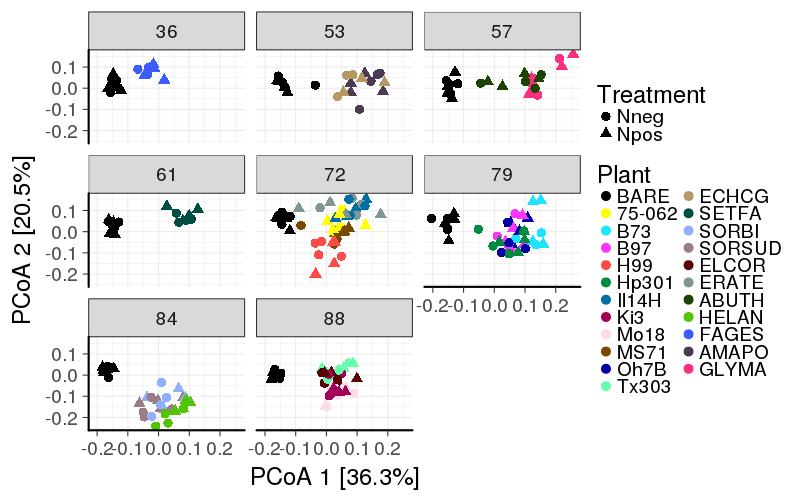

In [12]:
%%R -w 800 -h 500
sample_data(physeq.Full)$Plant = factor(sample_data(physeq.Full)$Plant, levels = c("BARE", "75-062", "B73", "B97" ,  "H99" , "Hp301",
                                                                      "Il14H",  "Ki3" , "Mo18", "MS71","Oh7B", "Tx303",
                                                                      "ECHCG", "SETFA", "SORBI", "SORSUD", 
                                                                      "ELCOR", "ERATE",
                                                                      "ABUTH", "HELAN", "FAGES", "AMAPO", "GLYMA"))

#Temp = subset_samples(physeq.Full, Treatment == "Nneg")
ordu = ordinate(physeq.Full, "PCoA", "unifrac", weighted=TRUE)
p = plot_ordination(physeq.Full, ordu, color="Plant", shape = "Treatment") +
geom_point(size = 4) + 

  scale_color_manual(values = c("#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")) +
#scale_shape_manual(values=c(0, 16, 17, 15, 3, 7))  
labs(x = "PCoA 1 [36.3%]", y = "PCoA 2 [20.5%]") +
theme_bw(base_size = 24) +
theme(panel.border = element_blank()) +
theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1))# +
#theme(legend.position="none")

p = p + facet_wrap(~DAP)
p

In [13]:
%%R
# saving figure

pdf(file = "/home/bryan/RhizCG/figures/ordinations/PCoA_facetbyDay.pdf", 
    height = 7.5, width = 14)
p  %>% print
dev.off()

png 
  2 


# Adonis testing treatment effects

In [21]:
%%R
set.seed(101)

df = as(sample_data(physeq.Full), "data.frame")
d = wunif.dist
Fulladonis = adonis(formula = d ~ Planted + DAP + Plant + Treatment, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis


Call:
adonis(formula = d ~ Planted + DAP + Plant + Treatment, data = df,      permutations = 999, strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Planted     1    2.2437 2.24374 141.493 0.25414  0.001 ***
DAP         7    1.4651 0.20930  13.199 0.16595  0.001 ***
Plant      21    1.7952 0.08549   5.391 0.20334  0.031 *  
Treatment   1    0.0421 0.04206   2.652 0.00476  0.001 ***
Residuals 207    3.2825 0.01586         0.37180           
Total     237    8.8287                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Rhizosphere 

In [22]:
%%R

physeq.plant = subset_samples(physeq.Full, Plant != "BARE")

#remove taxa that aren't in any plant samples
physeq.plant = filter_taxa(physeq.plant, function(x) max(x) > 0, TRUE)
physeq.plant

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4971 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4971 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4971 tips and 4970 internal nodes ]


In [16]:
%%R
sample_data(physeq.plant)$Plant %>% unique()

 [1] 75-062 Oh7B   SETFA  MS71   ERATE  FAGES  B73    AMAPO  B97    GLYMA 
[11] H99    Il14H  SORBI  SORSUD ELCOR  ABUTH  Ki3    HELAN  Tx303  Hp301 
[21] ECHCG  Mo18  
22 Levels: 75-062 B73 B97 H99 Hp301 Il14H Ki3 Mo18 MS71 Oh7B Tx303 ... GLYMA


In [23]:
%%R
registerDoParallel(cores=28)
plant.wunif.dist = distance(physeq.plant, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [24]:
%%R
df = as(sample_data(physeq.plant), "data.frame")
d = plant.wunif.dist
Plantadonis = adonis(formula = d ~ DAP + Plant + Treatment, df, strata = df$Rep:df$Plant, permutations = 999)
Plantadonis


Call:
adonis(formula = d ~ DAP + Plant + Treatment, data = df, permutations = 999,      strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)   
DAP         7    1.9678 0.281116 14.8741 0.32612  0.002 **
Plant      14    1.1572 0.082657  4.3735 0.19178  0.002 **
Treatment   1    0.0552 0.055211  2.9212 0.00915  0.002 **
Residuals 151    2.8539 0.018900         0.47296          
Total     173    6.0341                  1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Bare soil samples

In [19]:
%%R
phy = subset_samples(physeq.Full, Plant == "BARE")

#calculate distance matrix for subset
registerDoParallel(cores=28)
bare.wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)



In [20]:
%%R
#perform ADONIS
df = as(sample_data(phy), "data.frame")
d = bare.wunif.dist
Plantadonis = adonis(formula = d ~ DAP + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis


Call:
adonis(formula = d ~ DAP + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
DAP        7   0.13534 0.0193341  2.6147 0.24569  0.001 ***
Treatment  1   0.00883 0.0088320  1.1944 0.01603  0.194    
Residuals 55   0.40669 0.0073944         0.73828           
Total     63   0.55086                   1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Maize ADONIS

In [19]:
%%R
phy.maize = subset_samples(physeq.Full, Type == "Maize")

#calculate distance matrix for subset
registerDoParallel(cores=28)
maize.wunif.dist = distance(phy.maize, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)



In [20]:
%%R
#perform ADONIS
df = as(sample_data(phy.maize), "data.frame")
d = maize.wunif.dist
Maizeadonis = adonis(formula = d ~ DAP + Plant + Treatment, df, strata = df$Rep:df$Plant, permutations = 999)
Maizeadonis

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.



Call:
adonis(formula = d ~ DAP + Plant + Treatment, data = df, permutations = 999,      strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)  
DAP        2   0.22307 0.111533  6.4364 0.10532  0.011 *
Plant      8   0.54785 0.068481  3.9520 0.25866  0.011 *
Treatment  1   0.03017 0.030173  1.7412 0.01425  0.011 *
Residuals 76   1.31695 0.017328         0.62178         
Total     87   2.11804                  1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Calculate genotype effect on each date

#### DAP = 36 only one plant

#### DAP = 53

In [56]:
%%R

plant53 = subset_samples(physeq.Full, DAP == 53 & Plant != "BARE")

sample_data(plant53)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plant53.wunif.dist = distance(plant53, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plant53), "data.frame")
d = plant53.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "ECHCG" "AMAPO"

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)  
Plant      1   0.04534 0.045341  1.9176 0.13721  0.075 .
Treatment  1   0.02502 0.025022  1.0583 0.07572  0.390  
Residuals 11   0.26009 0.023645         0.78707         
Total     13   0.33046                  1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### DAP = 57

In [60]:
%%R
plantDay = subset_samples(physeq.Full, DAP == 57 & Plant != "BARE")

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "ABUTH" "GLYMA"

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)   
Plant      1   0.12351 0.123507  3.4597 0.19888  0.002 **
Treatment  1   0.03343 0.033426  0.9363 0.05383  0.428   
Residuals 13   0.46408 0.035698         0.74729          
Total     15   0.62101                  1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### DAP =  61; only one plant

#### DAP =  72

In [61]:
%%R
plantDay = subset_samples(physeq.Full, DAP == 72 & Plant != "BARE")

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "75-062" "H99"    "Il14H"  "MS71"   "ERATE" 

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Plant      4   0.44262 0.110655  6.5764 0.42963  0.001 ***
Treatment  1   0.01553 0.015534  0.9232 0.01508  0.378    
Residuals 34   0.57208 0.016826         0.55529           
Total     39   1.03023                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Day 79

In [62]:
%%R
plantDay = subset_samples(physeq.Full, DAP == 79 & Plant != "BARE")

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "B73"   "B97"   "Hp301" "Oh7B" 

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)   
Plant      3   0.10729 0.035762  1.7738 0.15490  0.008 **
Treatment  1   0.04099 0.040992  2.0332 0.05918  0.020 * 
Residuals 27   0.54434 0.020161         0.78592          
Total     31   0.69262                  1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Day 84

In [63]:
%%R
plantDay = subset_samples(physeq.Full, DAP == 84 & Plant != "BARE")

sample_data(plantDay)$Plant %>% levels() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "SORBI"  "SORSUD" "HELAN" 

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Plant      2   0.14327 0.071637  4.3686 0.28414  0.001 ***
Treatment  1   0.03299 0.032989  2.0117 0.06542  0.067 .  
Residuals 20   0.32797 0.016398         0.65043           
Total     23   0.50423                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Day 88

In [64]:
%%R
plantDay = subset_samples(physeq.Full, DAP == 88 & Plant != "BARE")

sample_data(plantDay)$Plant %>% levels() %>% print
sample_data(plantDay)$Library %>% unique() %>% print

registerDoParallel(cores=28)
plantDay.wunif.dist = distance(plantDay, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

df = as(sample_data(plantDay), "data.frame")
d = plantDay.wunif.dist

Plantadonis = adonis(formula = d ~ Plant + Treatment, df, strata = df$Rep, permutations = 999)
Plantadonis

[1] "Ki3"   "Mo18"  "Tx303" "ELCOR"
[1] 2

Call:
adonis(formula = d ~ Plant + Treatment, data = df, permutations = 999,      strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Plant      3   0.29518 0.098393  6.5325 0.40691  0.001 ***
Treatment  1   0.02357 0.023566  1.5646 0.03249  0.142    
Residuals 27   0.40667 0.015062         0.56061           
Total     31   0.72542                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Weighted UniFrac Faceted by Day

In [ ]:
%%R -w 800 -h 800


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 5, pch = 21) +
        facet_wrap(~ DAP, ncol = 4) +
        scale_size(range=c(2,8))+
        theme_bw() +
        ggtitle("NMDS of w-UniFrac Distances") +
        theme(plot.title = element_text(face="bold", size=20))

p1

In [ ]:
%%R
##print to file
pdf(file = "/home/bryan/RhizCG/figures/ordinations/NMDS_wunif_facetbyday.pdf", 
    height = 6, width = 9)
p1 %>% print
dev.off()

# Sandbox

In [ ]:
%%R
set.seed(1)
phy = subset_samples(physeq.Full, !is.na(InorganicN))

#calculate distance matrix for subset
registerDoParallel(cores=28)
sub.wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

#perform ADONIS
df = as(sample_data(phy), "data.frame")
d = sub.wunif.dist
Fulladonis = adonis(formula = d ~ InorganicN + Planted + DAP + Plant, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis

In [ ]:
%%R
phy = subset_samples(physeq.plant, !is.na(InorganicN))

#calculate distance matrix for subset
registerDoParallel(cores=28)
sub.wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

#perform ADONIS
df = as(sample_data(phy), "data.frame")
d = sub.wunif.dist
Plantadonis = adonis(formula = d ~ InorganicN + DAP + Plant, df, strata = df$Rep:df$Plant, permutations = 999)
Plantadonis


In [ ]:
%%R
set.seed(63)
#perform ADONIS
df = as(sample_data(phy), "data.frame")
d = sub.wunif.dist
Plantadonis = adonis(formula = d ~ DAP + Plant + InorganicN, df, strata = df$Rep:df$Plant, permutations = 999)
Plantadonis

## CAP analysis of rhizosphere samples

In [ ]:
%%R -w 600 -h 600
phy = subset_samples(physeq.plant, !is.na(InorganicN))

phy.wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

sample_data(phy)$DAP = as.factor(sample_data(phy)$DAP)
unique(sample_data(phy)$DAP) %>% print
# CAP ordinate
cap.ord = ordinate(
    physeq = phy, 
    method = "CAP",
    distance = phy.wunif.dist,
    formula = ~ CB_activity_g + LAP_activity_g
)

# CAP plot
cap.plot <- plot_ordination(
    phy, 
    cap.ord, 
    color = "Plant", 
    axes = c(1,2)
    ) + 
    aes(shape = Type) + 
    geom_point(aes(colour = Plant), 
        alpha= 1, 
        size = 4) + 
    #geom_point(colour = "grey90", 
    #    size = 1.5) + 
    theme_bw(base_size = 16)
    #scale_color_manual(values = c("#a65628", "red", "#ffae19", "#4daf4a", 
    #    "#1919ff", "darkorchid3", "magenta"))

cap.plot

In [ ]:
%%R -w 800 -h 600
# Now add the environmental variables as arrows
arrowmat <- vegan::scores(cap.ord, display = "bp")


# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)

# Define the arrow aesthetic mapping
arrow_map <- aes(xend = CAP1, 
    yend = CAP2, 
    x = 0, 
    y = 0, 
    shape = NULL, 
    color = NULL, 
    label = labels)

label_map <- aes(x = 1.3 * CAP1, 
    y = 1.3 * CAP2, 
    shape = NULL, 
    color = NULL, 
    label = labels)

arrowhead = arrow(length = unit(0.02, "npc"))

# Make a new graphic
cap.plot + 
geom_segment(arrow_map, 
    size = .5, 
    data = arrowdf, 
    color = "gray", 
    arrow = arrowhead
    ) + 
geom_text(label_map, 
    size = 4,  
    data = arrowdf, 
    show_guide = FALSE)

In [ ]:
%%R
summary(cap.ord)


## Hypothesis testing of weighted and un-weighted unifrac

In [ ]:
%%R
df = as(sample_data(physeq.snorm), "data.frame")
d = wunif.dist
Fulladonis = adonis(formula = d ~ Library + Planted + DAP + Plant + Treatment, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis

In [ ]:
%%R
a = data.frame(Fulladonis$aov.tab)
write.table(a, file = "/home/bryan/RhizCG/figures/FullADONIS.txt", sep = "\t")

In [ ]:
%%R
#Check model without Treatment effect only Nneg
df = as(sample_data(physeq.snorm.Nneg), "data.frame")
d = wunif.dist.Nneg
Nnegadonis = adonis(formula = d ~ Library + Planted + DAP + Plant, df, strata = df$Rep, permutations = 999)
Nnegadonis

In [ ]:
%%R
df = as(sample_data(physeq.snorm), "data.frame")
d = unif.dist
Fulladonis = adonis(formula = d ~ DAP +  Planted + Plant + Treatment + Rep, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis

In [ ]:
%%R
df = as(sample_data(physeq.snorm.Nneg), "data.frame")
d = unif.dist.Nneg
Fulladonis = adonis(formula = d ~ DAP +  Planted + Plant + Rep, df, strata = df$Rep, permutations = 999)
Fulladonis

# Bare soils change with time w-UniFrac

In [ ]:
%%R

bare = subset_samples(physeq.snorm, Plant == "BARE")
sample_data(bare)$DAP = factor(sample_data(bare)$DAP)


In [ ]:
%%R
registerDoParallel(cores=28)
bare.wunif.dist = distance(bare, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 800 -h 350


nmds = ordinate(bare, 
                method = "NMDS", 
               distance = bare.wunif.dist)

p = plot_ordination(bare, nmds, justDF = TRUE)

In [ ]:
%%R -w 750 -h 800


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=DAP), size = 6, pch=21) 

p1

### Hypothesis Test adonis

In [ ]:
%%R
df = as(sample_data(bare), "data.frame")
d = bare.wunif.dist
bareadonis = adonis(d ~ DAP*Treatment + Rep, df, strata = df$Rep)
bareadonis

# Bare Soil Change with Time uw-UniFrac

In [ ]:
%%R
registerDoParallel(cores=28)
bare.unif.dist = distance(bare, 
                      method = "unifrac", 
                      weighted = FALSE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 800 -h 350


nmds = ordinate(bare, 
                method = "NMDS", 
               distance = bare.unif.dist)

p = plot_ordination(bare, nmds, justDF = TRUE)

In [ ]:
%%R -w 800 -h 350


nmds = ordinate(bare, 
                method = "NMDS", 
               distance = bare.unif.dist)

p = plot_ordination(bare, nmds, justDF = TRUE)

In [ ]:
%%R -w 750 -h 800


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=DAP), size = 6, pch=21) 

p1

### Hypothesis Test adonis

In [ ]:
%%R
df = as(sample_data(bare), "data.frame")
d = bare.unif.dist
bareadonis = adonis(d ~ DAP*Treatment + Rep, df, strata = df$Rep)
bareadonis

### subset just plants from Nneg and Npos

In [ ]:
%%R

plantNneg = subset_samples(plant, Treatment == "Nneg")
sample_data(plantNneg)$DAP = factor(sample_data(plantNneg)$DAP)
plantNneg %>% print
plantNpos = subset_samples(plant, Treatment == "Npos")
sample_data(plantNpos)$DAP = factor(sample_data(plantNpos)$DAP)
plantNpos %>% print

In [ ]:
%%R -w 750 -h 800
#Whole plant set

plantnmds = ordinate(plant, 
                method = "NMDS", 
               distance = plant.wunif.dist)

p = plot_ordination(plant, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [ ]:
%%R -w 750 -h 800
#Whole plant set

plantNnegnmds = ordinate(plantNneg, 
                method = "NMDS", 
               distance = plantNneg.wunif.dist)

p = plot_ordination(plantNneg, plantNnegnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [ ]:
%%R -w 750 -h 800
#Whole plant set

plantNposnmds = ordinate(plantNpos, 
                method = "NMDS", 
               distance = plantNpos.wunif.dist)

p = plot_ordination(plantNpos, plantNposnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1


## subset for particular day to test significance of plant while controlling for date

### subset maize on a particular day

In [ ]:
%%R

plant72 = subset_samples(plantNneg, DAP == 72)
maize72 = subset_samples(plant72, Type == "Maize")
maize72
sample_data(maize72)$Plant %>% levels

In [ ]:
%%R
registerDoParallel(cores=28)
maize72.wunif.dist = distance(maize72, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 750 -h 800
#Day 88

plantnmds = ordinate(maize72, 
                method = "NMDS", 
               distance = maize72.wunif.dist)

p = plot_ordination(maize72, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [ ]:
%%R
df = as(sample_data(maize72), "data.frame")
d = maize72.wunif.dist
plantadonis = adonis(d ~ Plant, df, strata = df$Rep)
plantadonis

### Day 88

In [ ]:
%%R
plant88 = subset_samples(plantNneg, DAP == 88)
plant88

In [ ]:
%%R
registerDoParallel(cores=28)
plant88.wunif.dist = distance(plant88, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 750 -h 800
#Day 88

plantnmds = ordinate(plant88, 
                method = "NMDS", 
               distance = plant88.wunif.dist)

p = plot_ordination(plant88, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

## Significance test of plant effect on single day

In [ ]:
%%R
df = as(sample_data(plant88), "data.frame")
d = plant88.wunif.dist
plantadonis = adonis(d ~ Plant, df, strata = df$Rep)
plantadonis

### Maize on day 88

In [ ]:
%%R
maize88 = subset_samples(plant88, Type == "Maize")
maize88

In [ ]:
%%R
registerDoParallel(cores=28)
maize88.wunif.dist = distance(maize88, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 750 -h 800
#Day 88

plantnmds = ordinate(maize88, 
                method = "NMDS", 
               distance = maize88.wunif.dist)

p = plot_ordination(maize88, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [ ]:
%%R
df = as(sample_data(maize88), "data.frame")
d = maize88.wunif.dist
plantadonis = adonis(d ~ Plant, df, strata = df$Rep)
plantadonis

### maize on day

In [ ]:
%%R
sample_data(plantNneg)$DAP %>% levels

In [ ]:
%%R

plant79 = subset_samples(plantNneg, DAP == 79)
maize79 = subset_samples(plant79, Type == "Maize")
maize79
sample_data(maize79)$Plant %>% levels

In [ ]:
%%R
registerDoParallel(cores=28)
maize79.wunif.dist = distance(maize79, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [ ]:
%%R -w 750 -h 800
#Day 88

plantnmds = ordinate(maize79, 
                method = "NMDS", 
               distance = maize79.wunif.dist)

p = plot_ordination(maize79, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [ ]:
%%R
df = as(sample_data(maize79), "data.frame")
d = maize79.wunif.dist
plantadonis = adonis(d ~ Plant, df, strata = df$Rep)
plantadonis